# EDA[Exploratory Data Analysis]
- EDA stands for Exploratory Data Analysis. It is an approach to analyzing and visualizing data sets to summarize their main characteristics, often       with the help of statistical graphics and other data visualization methods. The primary goal of EDA is to uncover patterns, relationships, anomalies,   and insights within the data, helping to guide further analysis or hypothesis testing.

- Iris flower classification 

# Import Libraries

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read data 

In [137]:
Iris=pd.read_csv("D:/DS NOTE/OASIS INFO BYTE/Iris Flower Classification/Iris.csv")
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Understand the Structure of the Data:

In [138]:
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [139]:
Iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [140]:
Iris.shape

(150, 6)

# Detect missing values

In [141]:
Iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Denoting duplicate rows

In [142]:
Iris.duplicated().sum()

0

# Outlier

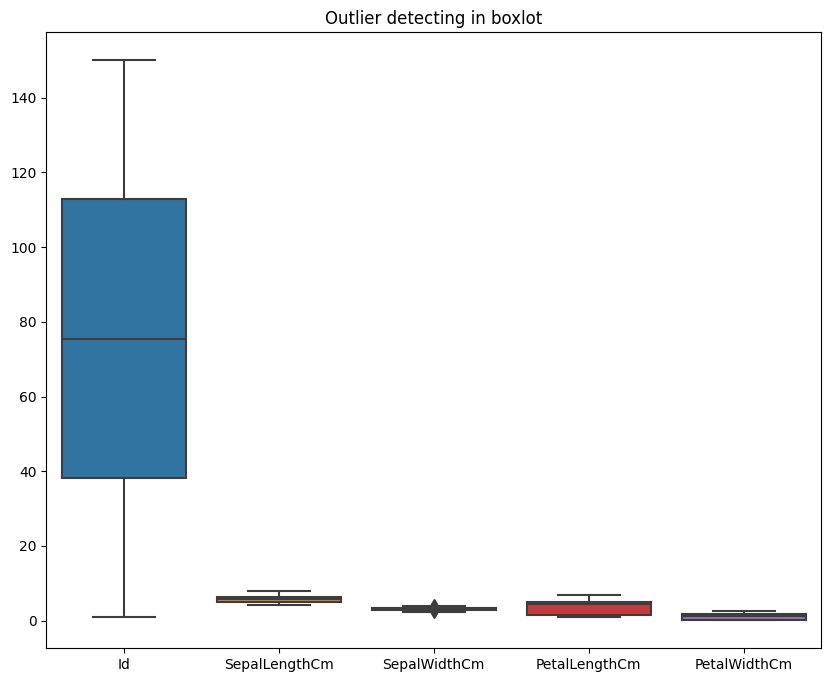

In [143]:
plt.figure(figsize=(10,8))
sns.boxplot(Iris)
plt.title('Outlier detecting in boxlot')
plt.show()

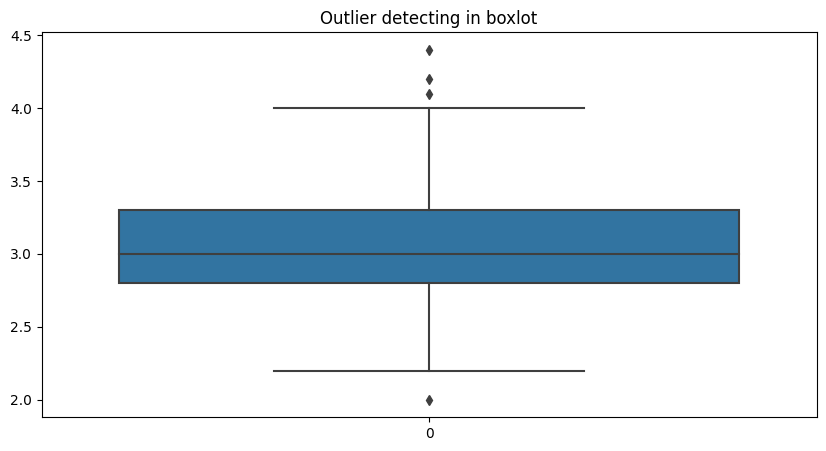

In [144]:
# now we assume that sepalwidht have a some outlier plot show q1 range to q3 outside data 
plt.figure(figsize=(10,5))
sns.boxplot(Iris['SepalWidthCm'])
plt.title('Outlier detecting in boxlot')
plt.show()

# Outlier remove process/IQR method

In [145]:
q1=Iris['SepalWidthCm'].quantile(0.25)
q1

2.8

In [146]:
q3=Iris['SepalWidthCm'].quantile(0.75)
q3

3.3

In [147]:
IQR=q3-q1
IQR

0.5

In [148]:
lower_range=q1-1.5*IQR
lower_range

2.05

In [149]:
upper_range=q3+IQR
upper_range 

3.8

# IQR-Capping 


In [150]:
Iris['SepalWidthCm']=np.where(Iris['SepalWidthCm']<lower_range,lower_range,
                     np.where(Iris['SepalWidthCm']>upper_range,upper_range,
                              Iris['SepalWidthCm']))
Iris['SepalWidthCm']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: SepalWidthCm, Length: 150, dtype: float64

# After Remove Outlier 

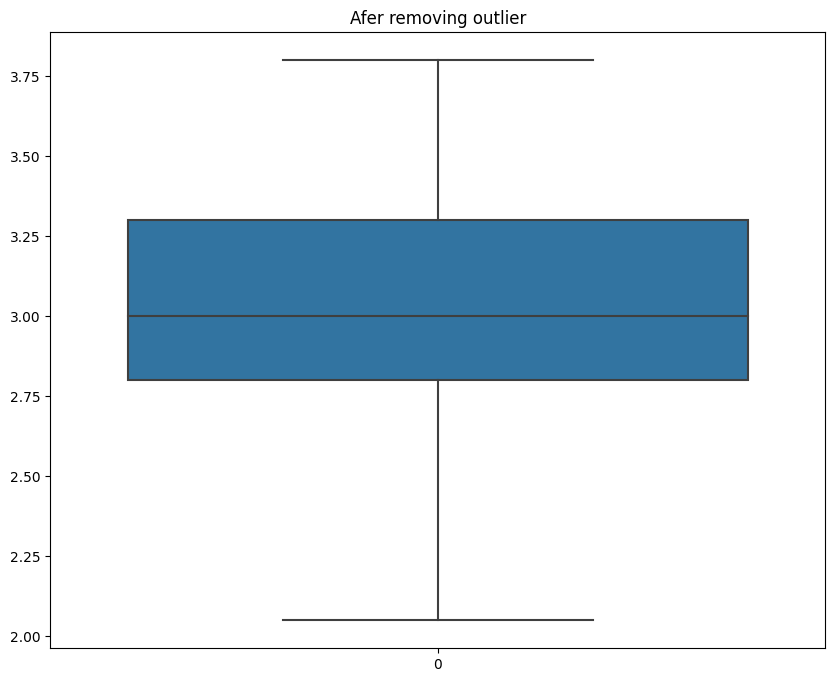

In [151]:
plt.figure(figsize=(10,8))
sns.boxplot(Iris['SepalWidthCm'])
plt.title('Afer removing outlier') 
plt.show()

# Map fuction 

In [152]:
Iris=Iris.replace({'Iris-versicolor':0,'Iris-setosa':1,'Iris-virginica':2})
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


# Hypotheses Testing 


# Step 1: Formulate Hypotheses
 -  Null Hypothesis (H0): The mean sepal length of setosa is equal to the mean sepal length of versicolor.
 -  Alternative Hypothesis (H1): The mean sepal length of setosa is not equal to the mean sepal length of versicolor.


# Step 2: Check Assumptions
- Assuming the sepal length data is approximately normally distributed and the variances are equal.
- These assumptions should be validated in a real-world scenario.




# Step 3:Read data

In [153]:
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


# Step 4:Select sepal lengths for setosa and versicolor

In [154]:
sepal_length_setosa = Iris[Iris['Species'] == 1]['SepalLengthCm']
sepal_length_versicolor = Iris[Iris['Species'] == 2]['SepalLengthCm']


In [155]:
# Display the sample sizes
print(f'Sample size for setosa: {len(sepal_length_setosa)}')
print(f'Sample size for versicolor: {len(sepal_length_versicolor)}')

Sample size for setosa: 50
Sample size for versicolor: 50


# Step 5: Set Significance Level (α)

In [156]:
alpha = 0.05

# Step 6: Perform the Test

In [157]:
t_statistic, p_value = stats.ttest_ind(setosa_sepal_length, versicolor_sepal_length)

# Step 7: Analyze Results

In [158]:
print(f'Test Statistic: {t_statistic}')
print(f'P-value: {p_value}')

Test Statistic: -10.52098626754911
P-value: 8.985235037487079e-18


# Step 8: Make a Decision

In [159]:
if p_value < alpha:
    print("Reject the null hypothesis. p_value < alpha value ,There is a significant difference in sepal length between setosa and versicolor.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in sepal length between setosa and versicolor.")


Reject the null hypothesis. p_value < alpha value ,There is a significant difference in sepal length between setosa and versicolor.


# Step 9: Draw Conclusions
- Reject the null hypothesis. p_value < alpha value ,There is a significant difference in sepal length between setosa and versicolor.

# Visualization 

C:\Users\dhana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x800 with 0 Axes>

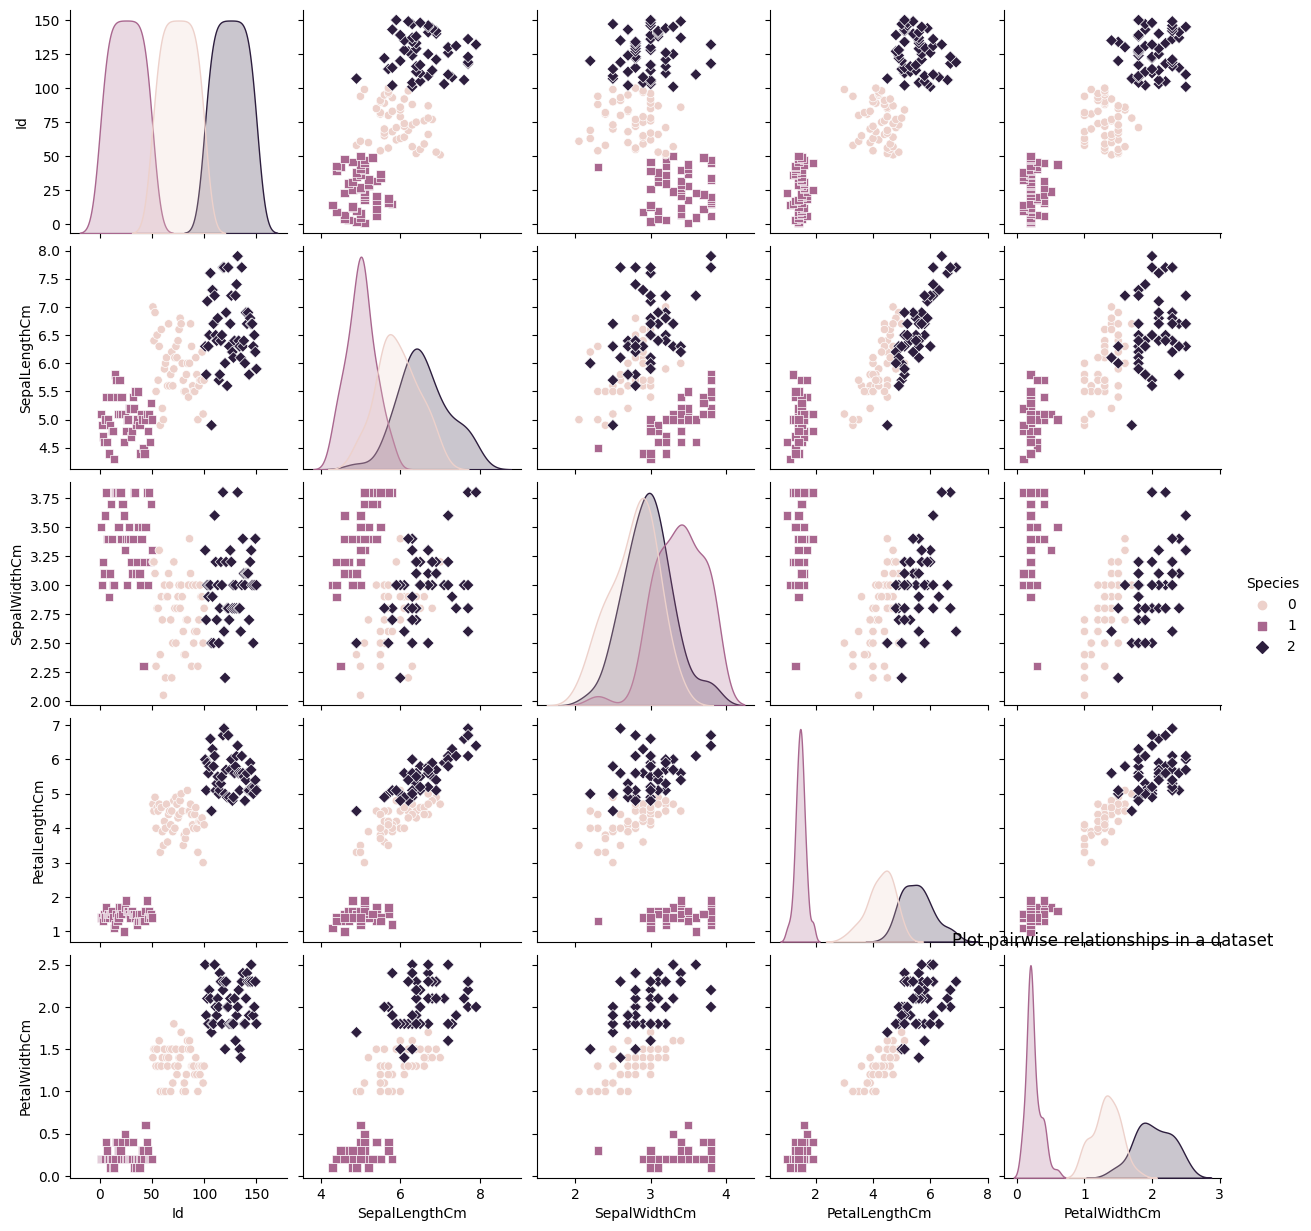

In [160]:
# Pairplot
plt.figure(figsize=(8,8))
sns.pairplot(Iris, hue='Species', markers=['o', 's', 'D'])
plt.title('Plot pairwise relationships in a dataset')
plt.show()


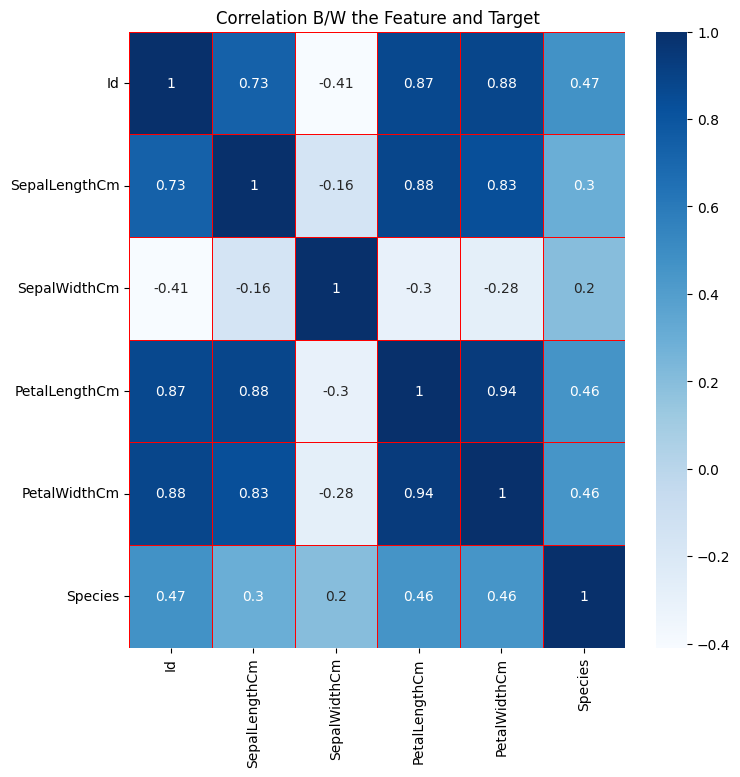

In [161]:
# Correlation Heatmap
plt.figure(figsize=(8,8))
sns.heatmap(Iris.corr('spearman'), annot=True, cmap='Blues', linewidths=.5, linecolor='Red')
plt.title('Correlation B/W the Feature and Target')
plt.show()


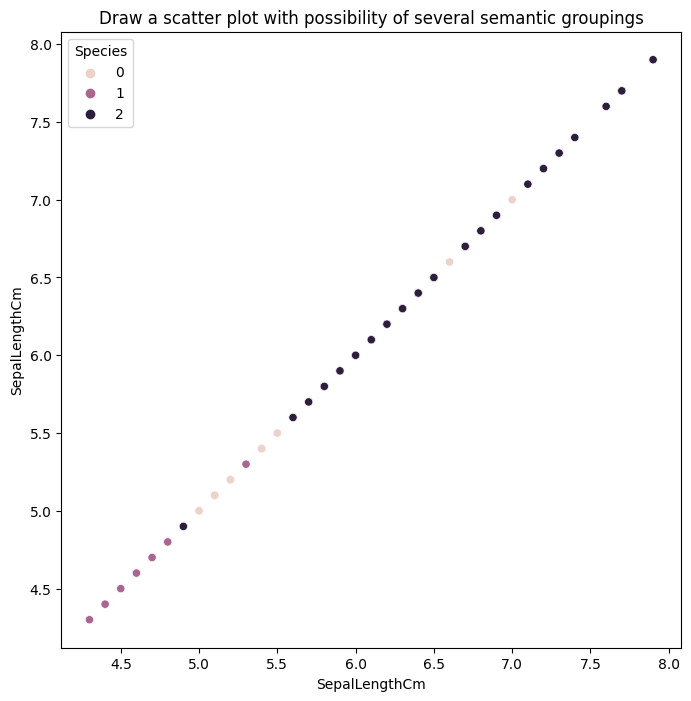

In [162]:
# Scatterplot
plt.figure(figsize=(8,8))
sns.scatterplot(x='SepalLengthCm', y='SepalLengthCm', hue='Species', data=Iris)
plt.title('Draw a scatter plot with possibility of several semantic groupings')
plt.show()


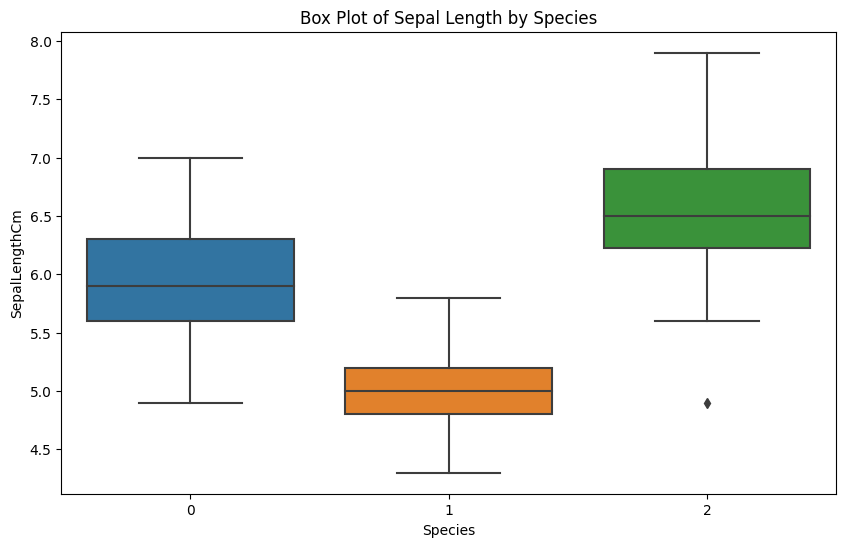

In [163]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='SepalLengthCm', data=Iris)
plt.title('Box Plot of Sepal Length by Species')
plt.show()

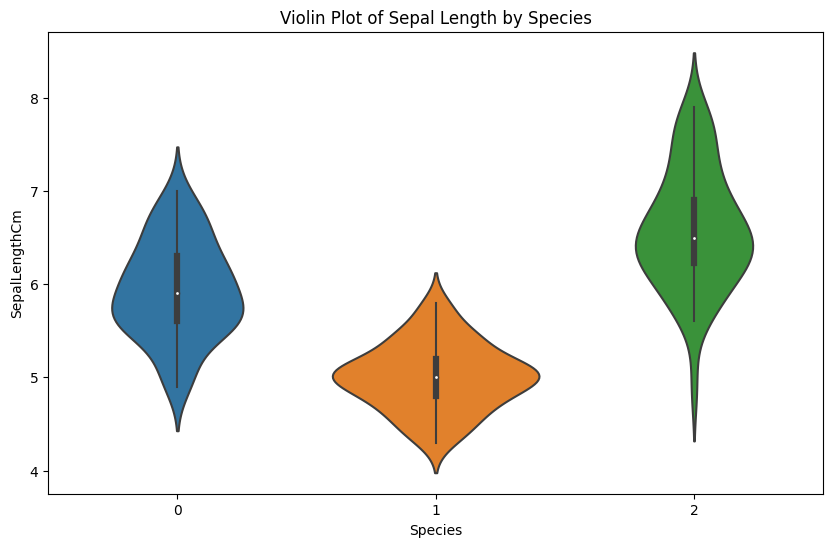

In [164]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Species', y='SepalLengthCm', data=Iris)
plt.title('Violin Plot of Sepal Length by Species')
plt.show()

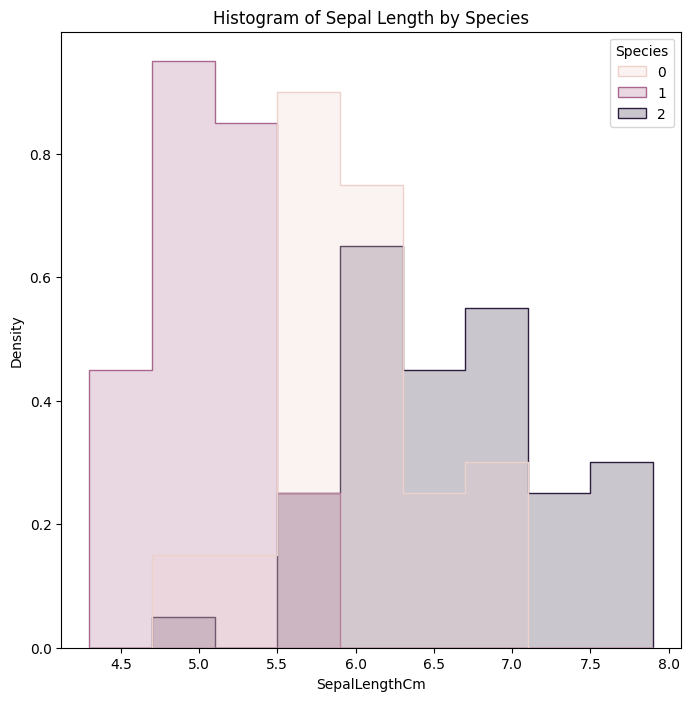

In [165]:
# Histogram
plt.figure(figsize=(8, 8))
sns.histplot(Iris, x='SepalLengthCm', hue='Species', element='step', stat='density', common_norm=False)
plt.title('Histogram of Sepal Length by Species')
plt.show()

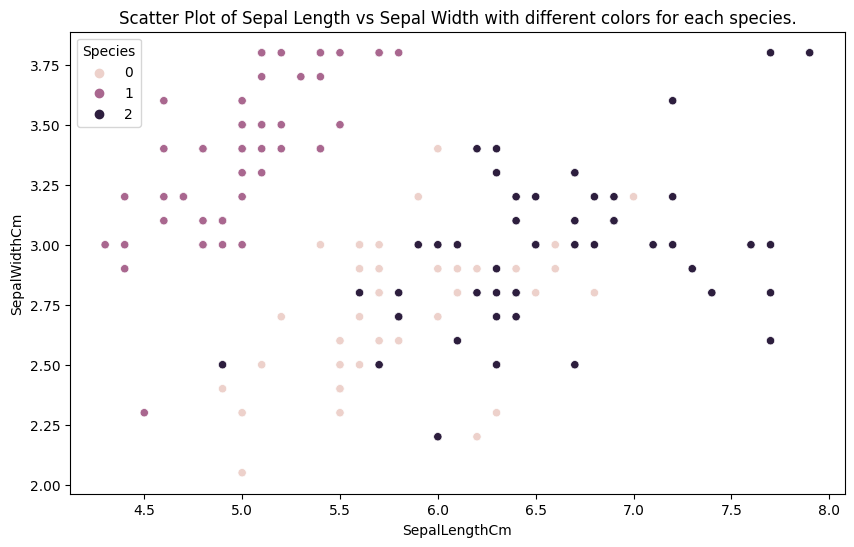

In [166]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=Iris)
plt.title('Scatter Plot of Sepal Length vs Sepal Width with different colors for each species.')
plt.show()